# **GROUP 15 - PREDICTING CROP PRODUCTION IN NIGERIA**

## **DATA PREPARATION**

#### Importing Data Science Cleaning Tools

In [2]:
import pandas as pd
import numpy as np

#### Importing Food Data

In [56]:
food_rawdata = pd.read_csv("Crops_AllData_Normalized.csv", encoding = 'cp1252')
food_rawdata.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F
1,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0,F
2,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1977,1977,ha,6000.0,F
3,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1978,1978,ha,6000.0,F
4,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1979,1979,ha,6000.0,F


In [4]:
print("General Information of Data:\n")
food_rawdata.info()

General Information of Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513868 entries, 0 to 2513867
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 211.0+ MB


#### Food Data Cleaning

In [75]:
#Removing irrelevant columns in the dataset
food_rawdata2 = food_rawdata.drop(["Area Code", "Item Code", "Element Code", "Year Code", "Flag"], axis = 1)
#food_rawdata2.head()

#Filtering Data to show food 'Produced' in Nigeria
food_prod = food_rawdata2.loc[food_rawdata2.Element == "Production"]
food_Nig = food_prod.loc[food_prod.Area == "Nigeria"]

food_Nig.reset_index(inplace = True)
food_Nig.head()

,index,Area,Item,Element,Year,Unit,Value
0,1184326,Nigeria,"Bastfibres, other",Production,1981,tonnes,530.0
1,1184327,Nigeria,"Bastfibres, other",Production,1982,tonnes,500.0
2,1184328,Nigeria,"Bastfibres, other",Production,1983,tonnes,500.0
3,1184329,Nigeria,"Bastfibres, other",Production,1984,tonnes,550.0
4,1184330,Nigeria,"Bastfibres, other",Production,1985,tonnes,600.0


In [77]:
#Are there Missing Values?
print("Missing Data:")
print("There are 123 missing values\n")
food_Nig.isnull().sum()

Missing Data:
There are 123 missing values



index        0
Area         0
Item         0
Element      0
Year         0
Unit         0
Value      123
dtype: int64

In [78]:
#Removing data with 'Missing Values' and 'zero - 0.0' data
food_Nig2 = food_Nig.dropna()
food_data = food_Nig2[food_Nig2.apply(lambda x:x["Value"] != 0.0, axis = 1)]

print("Missing Data:")
print("There are 0 missing values\n")

food_data.isnull().sum()

Missing Data:
There are 0 missing values



index      0
Area       0
Item       0
Element    0
Year       0
Unit       0
Value      0
dtype: int64

In [79]:
food_data = food_data.loc[(food_data.Year > 1960) & (food_data.Year < 2020)]
food_data.head()

,index,Area,Item,Element,Year,Unit,Value
0,1184326,Nigeria,"Bastfibres, other",Production,1981,tonnes,530.0
1,1184327,Nigeria,"Bastfibres, other",Production,1982,tonnes,500.0
2,1184328,Nigeria,"Bastfibres, other",Production,1983,tonnes,500.0
3,1184329,Nigeria,"Bastfibres, other",Production,1984,tonnes,550.0
4,1184330,Nigeria,"Bastfibres, other",Production,1985,tonnes,600.0


In [80]:
food_data = food_data.drop(["Area", "index", "Element", "Unit"], axis = 1)
food_data.columns = ['Food Class', 'Year', 'Quantity(Tonnes)']

food_data.head()

,Food Class,Year,Quantity(Tonnes)
0,"Bastfibres, other",1981,530.0
1,"Bastfibres, other",1982,500.0
2,"Bastfibres, other",1983,500.0
3,"Bastfibres, other",1984,550.0
4,"Bastfibres, other",1985,600.0


#### Population Data

In [10]:
World_Pop = pd.read_csv("Total_Population_All_Countries.csv", encoding = "cp1252")
World_Pop.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


In [17]:
#Filtering data to show Population for only Nigeria
Nig_Pop = World_Pop.loc[World_Pop.Location == "Nigeria"]

#Removing irrelevant columns in the dataset
Drop_Col = ["LocID","VarID","MidPeriod","PopMale","PopFemale",'Variant']
Nig_Pop = Nig_Pop.drop(Drop_Col, axis = 1)

Nig_Pop.head()

,Location,Time,PopTotal,PopDensity
178728,Nigeria,1950,37859.750,41.569
178729,Nigeria,1951,38424.142,42.189
178730,Nigeria,1952,39035.435,42.860
178731,Nigeria,1953,39686.159,43.574
178732,Nigeria,1954,40370.853,44.326


#### Creating a Subset of Popoulation Data from 1961 -2019

In [124]:
#Filtering Population data from 1961 - 2019 to match Food Production data
Nig_Pop1 = Nig_Pop.loc[(Nig_Pop.Time > 1960) & (Nig_Pop.Time < 2020)]
population = Nig_Pop1.reset_index()
population.drop(["index"], axis = 1, inplace = True)
population.columns = ['Location', 'Year', 'PopTotal','PopDensity']

population.head()

,Location,Year,PopTotal,PopDensity
0,Nigeria,1961,46063.570,50.577
1,Nigeria,1962,47029.818,51.637
2,Nigeria,1963,48032.932,52.739
3,Nigeria,1964,49066.762,53.874
4,Nigeria,1965,50127.920,55.039


In [24]:
#Are there missing values?

print("Missing Data: There are 0 missing values\n")

population.isnull().sum()

Missing Data: There are 0 missing values



Location      0
Time          0
PopTotal      0
PopDensity    0
dtype: int64

## **VISUALIZATION**

#### Importing Visualization packages

In [133]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#### Showing Plot for different food classes count

In [111]:
#Creating a dataset of the aggregates of the production of different food classes
food_types = pd.read_csv('food class.csv')
for lab, row in food_types.iterrows():
    food_types.loc[lab, 'QTY(megatonnes)'] = (row['Production(tonnes)']/1000000)
    

food_classes = food_types.groupby('Food_Class')[['QTY(megatonnes)']].sum()
food_classes.reset_index(inplace = True)
food_classes.head(20)

,Food_Class,QTY(megatonnes)
0,Cash crop,6.600384
1,Cereal,2156.345422
2,Fibre,0.042027
3,Fruit,1196.778883
4,Nut and Seed,132.928002
5,Oil,1265.102352
6,Pulses,118.134650
7,Root Vegetable,58.271517
8,Spice,0.235031
9,Tubers,5548.690196


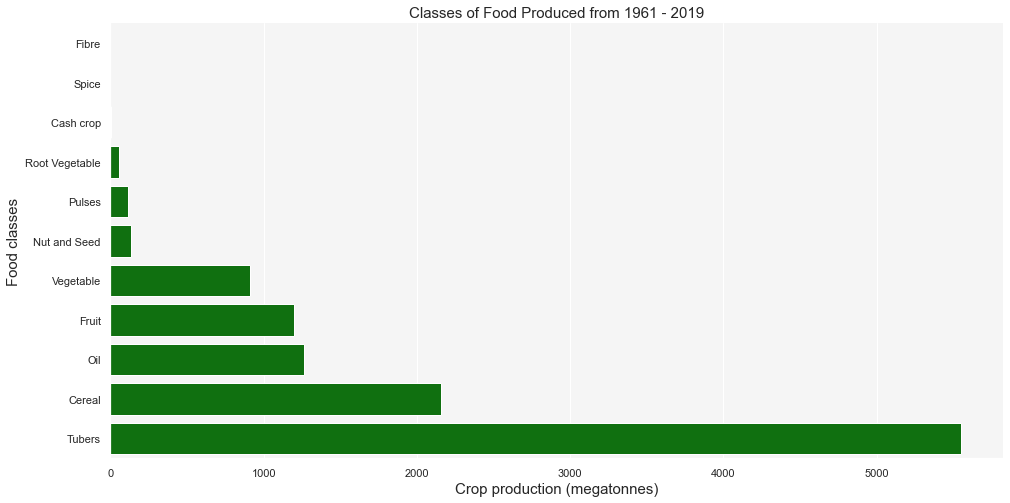

In [113]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_facecolor("#F5F5F5")
ax.spines[["right","top"]].set_visible(False)
plt.style.library['bmh']['axes.grid'] = True
plt.style.use('bmh')

sns.set_theme(style="whitegrid")
sns.set()
food_classes.sort_values('QTY(megatonnes)', ascending = True, inplace = True )
sns.barplot(x = 'QTY(megatonnes)', y = 'Food_Class', color = 'green', data = food_classes, orient = 'h')

plt.xlabel('Crop production (megatonnes)', fontsize = 15)
plt.ylabel('Food classes', fontsize = 15)
plt.title('Classes of Food Produced from 1961 - 2019', fontsize = 15)
plt.show()

#### Yearly Production Increase

In [114]:
#Aggregating data of Yearly food production
yearly_data = food_data.groupby("Year")[["Quantity(Tonnes)"]].sum()
yearly_data.reset_index(inplace=True)

# Converting Tonnes to MegaTonnes for easy readability and computation
yearly_data["QTY(megatonnes)"] = round(yearly_data["Quantity(Tonnes)"] / 1000000, ndigits=2)

yearly_data.head()

,Year,Quantity(Tonnes),QTY(megatonnes)
0,1961,75229287.0,75.23
1,1962,77560773.0,77.56
2,1963,81067203.0,81.07
3,1964,82532638.0,82.53
4,1965,87029523.0,87.03


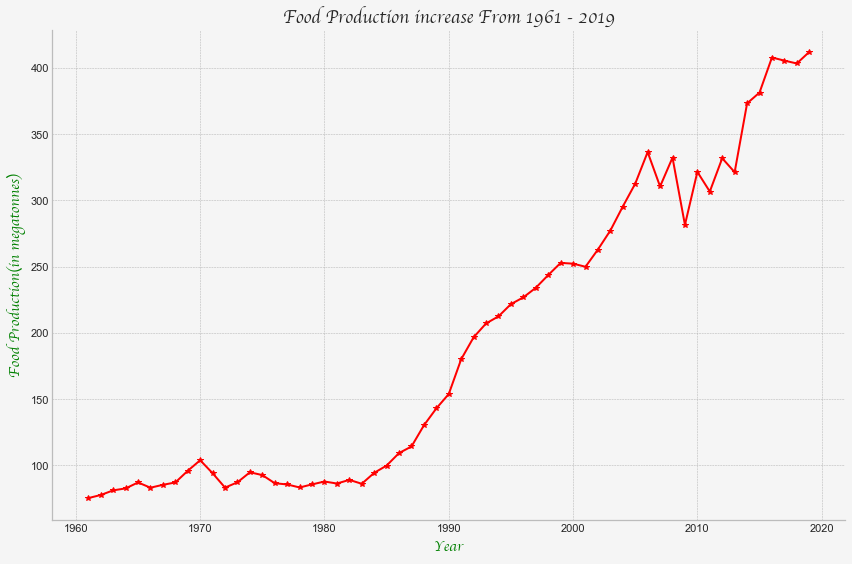

In [117]:
# Define plot space
fig, ax = plt.subplots(figsize=(12, 8),facecolor="#F5F5F5")
ax.set_facecolor("#F5F5F5")
ax.spines[["right","top"]].set_visible(False)
plt.style.library['bmh']['axes.grid'] = True
plt.style.use('bmh')

# set font
lfont = {'family':'cursive','color':'green','size':15,'linespacing':8,'fontweight':'bold'}
lfontred = {'family':'cursive','color':'red','size':15,'linespacing':8,'fontweight':'bold'}
hfont = {'family':'cursive','size':18,'fontweight':'heavy'}

plt.plot(yearly_data["Year"],yearly_data["QTY(megatonnes)"], color="red",marker='*')
plt.xlabel('Year',fontdict=lfont)
plt.ylabel('Food Production(in megatonnes)',fontdict=lfont)
plt.title('Food Production increase From 1961 - 2019',fontdict=hfont)
plt.tight_layout()

plt.show()

#### Plot a barchart showing Nigeria's year to year population from the year 1961 to 2019.

In [129]:
#Rounding up Population count to the nearest million
population["PopTotal"] = round(population["PopTotal"] / 1000000 * 1000, ndigits=2)
population.sort_values("PopTotal",ascending=False).head()

,Location,Year,PopTotal,PopDensity
58,Nigeria,2019,200.96,220.652
57,Nigeria,2018,195.87,215.065
56,Nigeria,2017,190.87,209.573
55,Nigeria,2016,185.96,204.179
54,Nigeria,2015,181.14,198.884


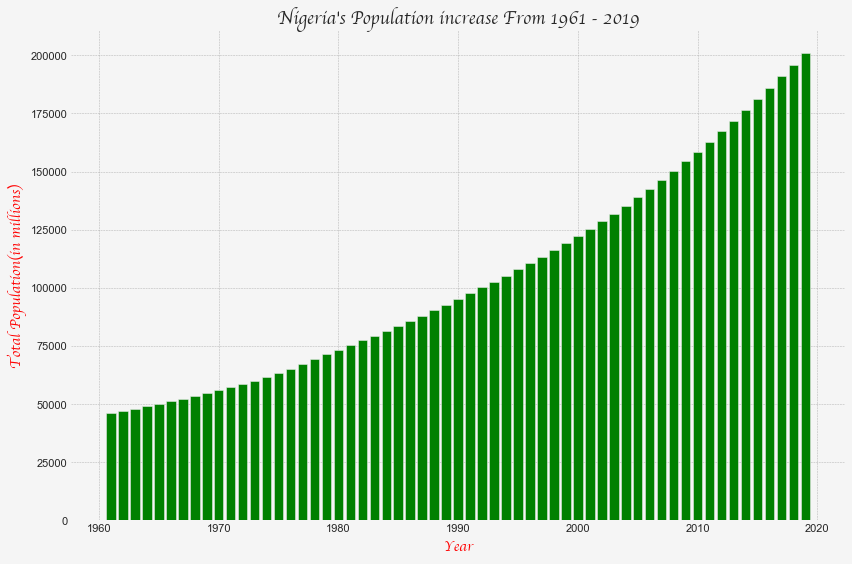

In [126]:
fig, ax = plt.subplots(figsize=(12, 8),facecolor="#F5F5F5")
ax.set_facecolor("#F5F5F5")
ax.spines[["right","top","bottom","left"]].set_visible(False)

pop = population["PopTotal"]
years = population["Year"]

plt.bar(years, pop, color="green")
plt.xlabel('Year',fontdict=lfontred)
plt.ylabel('Total Population(in millions)',fontdict=lfontred)
plt.title("Nigeria's Population increase From 1961 - 2019",fontdict=hfont)
plt.tight_layout()

plt.show()

#### Relationship between Yearly Crop Production and Yearly Population Growth

In [130]:
dmerge = yearly_data.merge(population, on="Year")
dmerge.head()

,Year,Quantity(Tonnes),QTY(megatonnes),Location,PopTotal,PopDensity
0,1961,75229287.0,75.23,Nigeria,46.06,50.577
1,1962,77560773.0,77.56,Nigeria,47.03,51.637
2,1963,81067203.0,81.07,Nigeria,48.03,52.739
3,1964,82532638.0,82.53,Nigeria,49.07,53.874
4,1965,87029523.0,87.03,Nigeria,50.13,55.039


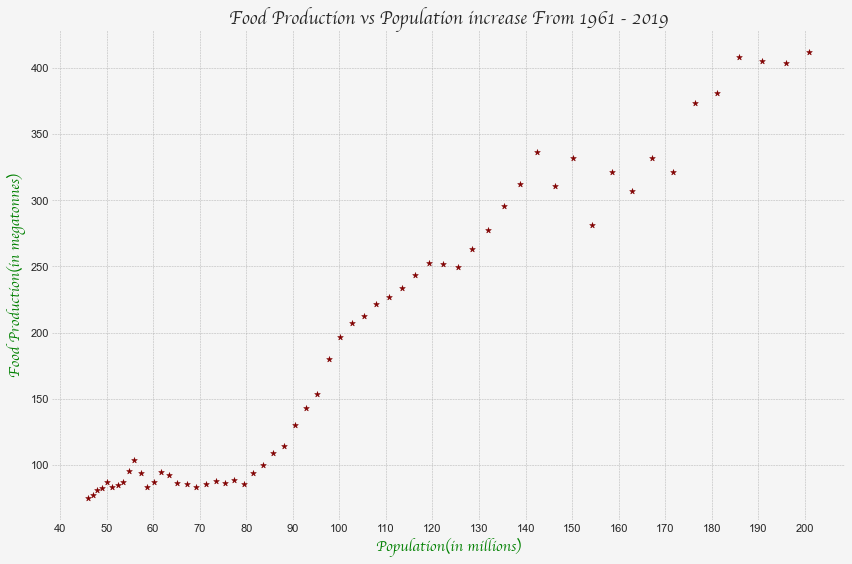

In [135]:
fig, ax = plt.subplots(figsize=(12, 8),facecolor="#F5F5F5")
ax.set_facecolor("#F5F5F5")
ax.spines[["right","top","bottom","left"]].set_visible(False)

pop_tot = dmerge["PopTotal"]
food_tot = dmerge["QTY(megatonnes)"]

plt.scatter(pop_tot, food_tot, color="maroon", marker="*")
plt.xlabel('Population(in millions)',fontdict=lfont)
plt.ylabel('Food Production(in megatonnes)',fontdict=lfont)
plt.title('Food Production vs Population increase From 1961 - 2019',fontdict=hfont)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.tight_layout()

plt.show()

#### Chart showing the ratio of increase in crop production in Nigeria to the corresponding increase in Nigeria's population on a year to year basis.

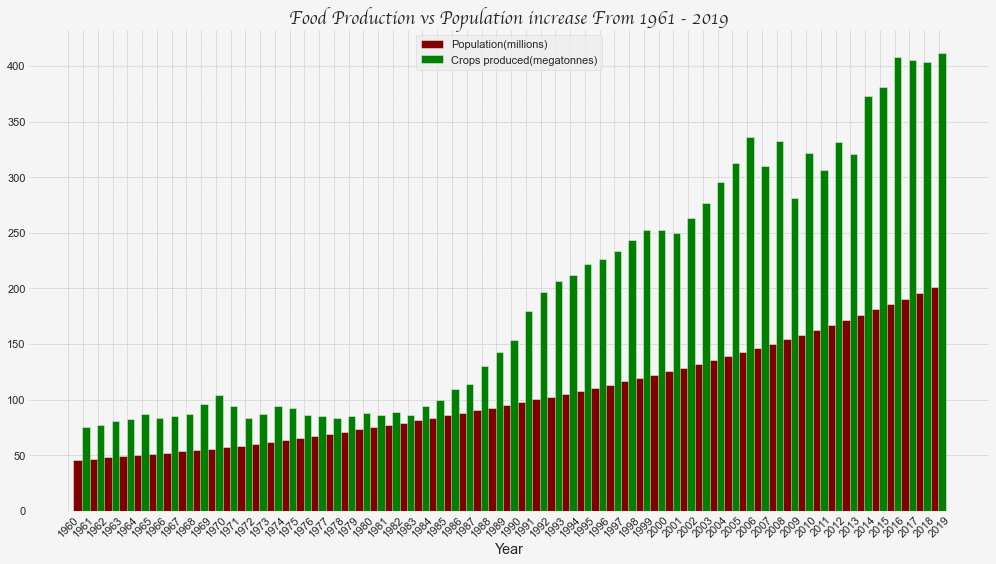

In [145]:
fig, ax = plt.subplots(figsize=(14, 8),facecolor="#F5F5F5")
ax.set_facecolor("#F5F5F5")
ax.spines[["right","top","bottom","left"]].set_visible(False)

pop_tot = dmerge["PopTotal"]
food_tot = dmerge["QTY(megatonnes)"]
year_tot = dmerge["Year"]

plt.bar(year_tot -0.25, pop_tot, color="maroon", width=0.9, label="Population(millions)")
plt.bar(year_tot +0.2, food_tot, color="green", width=0.5, label="Crops produced(megatonnes)")
plt.xlabel('Year')
plt.xticks(np.arange(1960, 2020, step=1), rotation=45)
plt.title('Food Production vs Population increase From 1961 - 2019',fontdict=hfont)
plt.legend(loc="upper center")
plt.tight_layout()

plt.show()

#### Chart showing the ratio of the percentage increase of Yearly Crop Production to the corresponding Population Growth

In [147]:
yearly_data["yearly_growth"] = yearly_data["QTY(megatonnes)"].pct_change() * 100
yearly_data = yearly_data.fillna(0)
yearly_data.head()

,Year,Quantity(Tonnes),QTY(megatonnes),yearly_growth
0,1961,75229287.0,75.23,0.000000
1,1962,77560773.0,77.56,3.097169
2,1963,81067203.0,81.07,4.525529
3,1964,82532638.0,82.53,1.800913
4,1965,87029523.0,87.03,5.452563


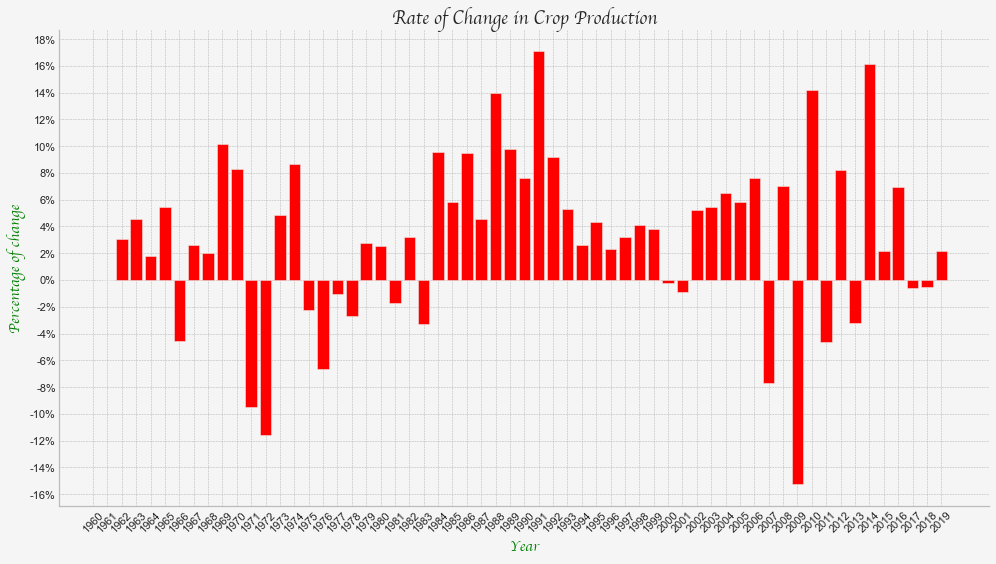

In [153]:
# Define plot space
fig, ax = plt.subplots(figsize=(14, 8),facecolor="#F5F5F5")
ax.set_facecolor("#F5F5F5")
ax.spines[["right","top"]].set_visible(False)

x1 = yearly_data["Year"]
y1 = yearly_data["yearly_growth"]

plt.bar(x1,y1, color="red")
plt.xlabel('Year',fontdict=lfont)
plt.ylabel('Percentage of change',fontdict=lfont)
plt.title('Rate of Change in Crop Production',fontdict=hfont)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_formatter('{x:1.0f}%')
plt.xticks(np.arange(1960, 2020, step=1), rotation=45)
plt.tight_layout()

plt.show()

In [149]:
population["yearly_growth"] = population["PopTotal"].pct_change() * 100
population = population.fillna(0)
# yearly_data.reset_index(inplace=True)
population.head()

,Location,Year,PopTotal,PopDensity,yearly_growth
0,Nigeria,1961,46.06,50.577,0.000000
1,Nigeria,1962,47.03,51.637,2.105949
2,Nigeria,1963,48.03,52.739,2.126302
3,Nigeria,1964,49.07,53.874,2.165313
4,Nigeria,1965,50.13,55.039,2.160179


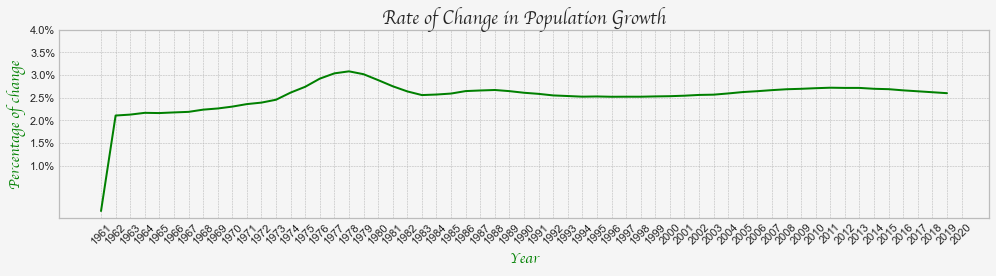

In [152]:
fig, ax = plt.subplots(figsize=(14, 4),facecolor="#F5F5F5")
ax.set_facecolor("#F5F5F5")

x2 = population["Year"]
y2 = population["yearly_growth"]

plt.plot(x2, y2, color="green")
plt.xlabel('Year',fontdict=lfont)
plt.ylabel('Percentage of change',fontdict=lfont)
plt.title('Rate of Change in Population Growth',fontdict=hfont)
plt.yticks(np.arange(1, max(y2)+1, step=0.5))
ax.yaxis.set_major_formatter('{x:1.1f}%')
plt.xticks(np.arange(min(x2), max(x2)+2, step=1), rotation=45)
plt.tight_layout()

plt.show()

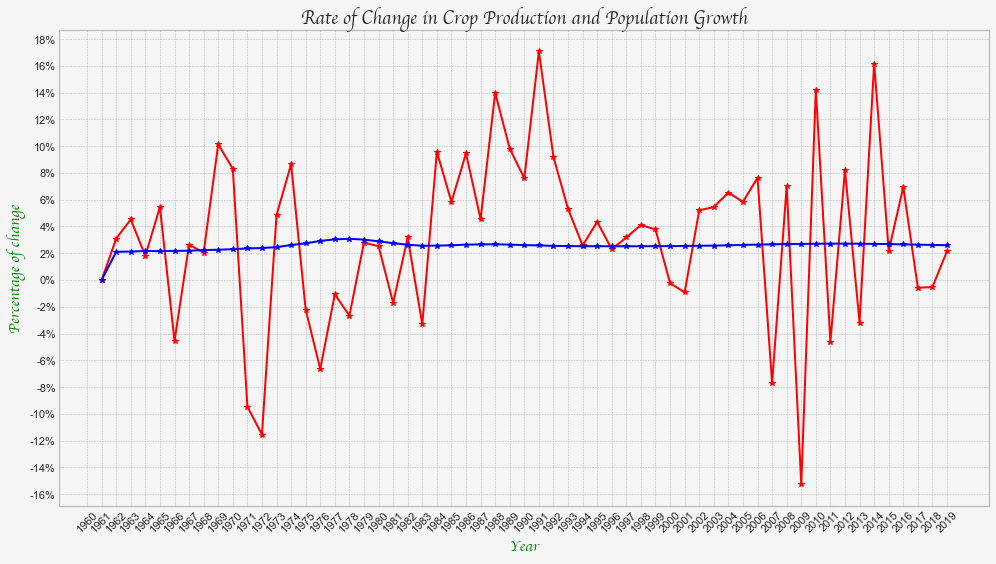

In [191]:
# Define plot space
fig, ax = plt.subplots(figsize=(14, 8),facecolor="#F5F5F5")
ax.set_facecolor("#F5F5F5")

plt.plot(x1,y1, color="red",marker='*')
plt.plot(x2,y2, color="blue",marker='*')
plt.xlabel('Year',fontdict=lfont)
plt.ylabel('Percentage of change',fontdict=lfont)
plt.title('Rate of Change in Crop Production and Population Growth',fontdict=hfont)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_formatter('{x:1.0f}%')
plt.xticks(np.arange(1960, 2020, step=1), rotation=45)
plt.tight_layout()

plt.show()

#### Correlation Heatmap 

<AxesSubplot:>

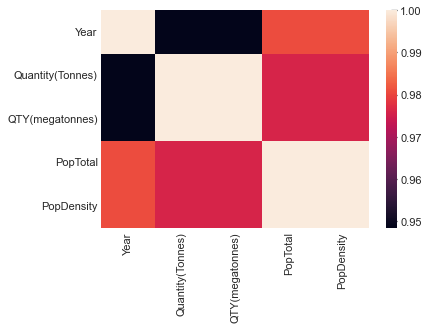

In [156]:
#Plotting a Heat map to see correlation between variables
sns.heatmap(dmerge.corr())

## **MODELLING**

### **Linear Regression**

In [157]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [175]:
#Assigning features to variables
x = population[["PopTotal", "PopDensity"]]
y = dmerge["QTY(megatonnes)"].array.reshape(-1, 1)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

#Importing test/train/split module
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Creatingand training the model
model = LinearRegression()
model.fit(x_train, y_train)

#Checking predictions for 'y' against 'y_test' data using 'x_test' data
y_pred = model.predict(x_test)
x_pred = model.predict(x_train)

print(y_pred)

[[-1.31214385]
 [-1.15906211]
 [ 0.07292362]
 [-0.92691243]
 [ 0.82335628]
 [ 1.510763  ]
 [ 1.93692002]
 [-0.39644383]
 [ 0.9807514 ]
 [-1.01004463]
 [ 1.13637405]
 [-1.19723213]]


In [209]:
print("B0: ", model.intercept_)
print("B1: ", model.coef_)

B0:  [0.07314046]
B1:  [[0.47324944 0.47299206]]


In [211]:
scores = cross_val_score(model, x_train, y_train.ravel(), cv=5)
print(scores)
print("Mean model accuracy: ", scores.mean())

[0.95646066 0.93112076 0.94267691 0.87931671 0.94600155]
Mean model accuracy:  0.9311153192222712


In [210]:
#Checking accuracy of predictions
from sklearn.metrics import r2_score
print(f"r2 Score Of Test Set : {r2_score(y_test, y_pred)}")
print(f"r2 Score Of Training Set : {r2_score(y_train, x_pred)}")
print(f"r2 Root Mean Square Errors Of Training Set : {mean_squared_error(y_test, y_pred, squared = False)}")

r2 Score Of Test Set : 0.9621324982084493
r2 Score Of Training Set : 0.9481400340814594
r2 Root Mean Square Errors Of Training Set : 0.22368629562560002


##### Plot showing Test and Predicted Values of Linear Regression

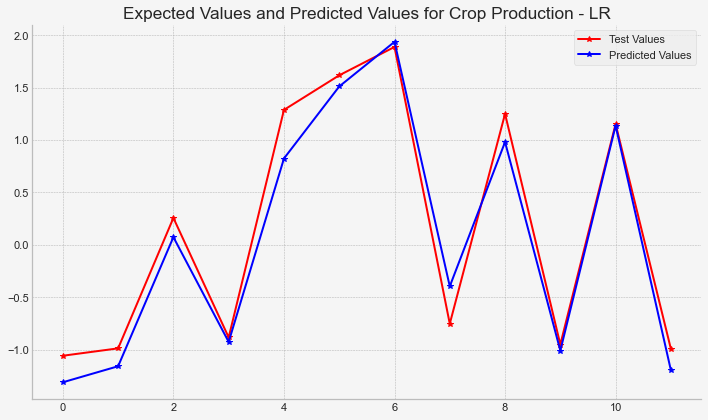

In [170]:
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6),facecolor="#F5F5F5")
ax.set_facecolor("#F5F5F5")
ax.spines[["right","top"]].set_visible(False)
plt.style.library['bmh']['axes.grid'] = True
plt.style.use('bmh')

# set font
lfont = {'family':'cursive','color':'green','size':15,'linespacing':8,'fontweight':'bold'}
lfontred = {'family':'cursive','color':'red','size':15,'linespacing':8,'fontweight':'bold'}
hfont = {'family':'cursive','size':18,'fontweight':'heavy'}

plt.plot(y_test, color="red",marker='*',label ='Test Values')
plt.plot(y_pred, color="blue",marker='*',label ='Predicted Values')
plt.title('Test Values and Predicted Values for Crop Production - LR')
plt.tight_layout()
  
# Function add a legend  
plt.legend()

plt.show()

### **Bayesian Regression**

In [172]:
#Importing tools for Bayesian Regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import BayesianRidge

In [178]:
# Creating and training model
model = BayesianRidge()
model.fit(x_train, y_train.ravel())

print("B0: ", model.intercept_)
print("B1: ", model.coef_)

B0:  -0.022391865602415434
B1:  [0.4885922  0.48797372]


In [182]:
scores = cross_val_score(model, x_train, y_train.ravel(), cv=5)
print(scores)
print("Mean model accuracy: ", scores.mean())

[0.9515248  0.94795479 0.92882757 0.89077813 0.96733154]
Mean model accuracy:  0.9372833665656938


In [184]:
# Model making a prediction on training data
train_pred = model.predict(x_train)

# Model making a prediction on test data
y_pred = model.predict(x_test)

# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, y_pred)}")
print(f"r2 Score Of Training Set : {r2_score(y_train, train_pred)}")
print(f"r2 Root Mean Square Errors Of Training Set : {mean_squared_error(y_test, y_pred, squared = False)}")

r2 Score Of Test Set : 0.9621324982084493
r2 Score Of Training Set : 0.9476847151029867
r2 Root Mean Square Errors Of Training Set : 0.22368629562560002


##### Plotting Test and Predicted Values of Bayesian Regression

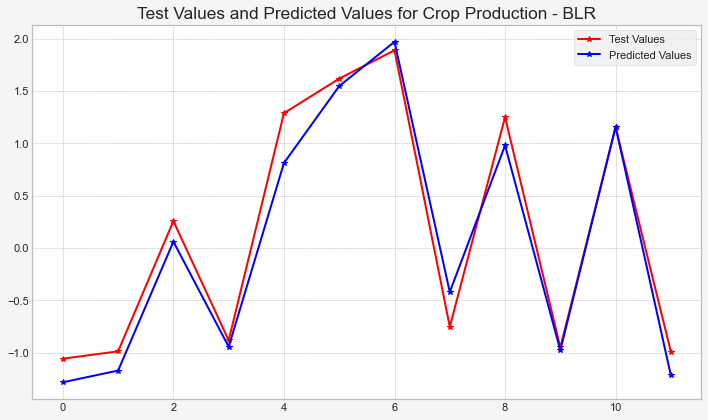

In [187]:
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6),facecolor="#F5F5F5")
ax.set_facecolor("white")
#ax.spines[["right","top"]].set_visible(False)
#plt.style.library['bmh']['axes.grid'] = True
#plt.style.use('bmh')

#Set Font
lfont = {'family':'cursive','color':'green','size':15,'linespacing':8,'fontweight':'bold'}
lfontred = {'family':'cursive','color':'red','size':15,'linespacing':8,'fontweight':'bold'}
hfont = {'family':'cursive','size':18,'fontweight':'heavy'}

plt.plot(y_test, color="red",marker='*',label ='Test Values')
plt.plot(y_pred, color="blue",marker='*',label ='Predicted Values')
plt.title('Test Values and Predicted Values for Crop Production - BLR')
plt.tight_layout()
plt.legend()
plt.show()

### **Support Vector Regression**

In [198]:
#Importing tools for SVR (other tools have been imported)
from sklearn.svm import SVR
import time

In [201]:
# Creating and training model
for kernel in ["poly","rbf","linear"]:
    start = time.time()
    model = SVR(kernel=kernel, C=1, epsilon=0.01)
    model.fit(x_train, y_train.ravel())
    print(f"Time taken for {kernel.title()}: {time.time() - start}")

    print("B0: ", model.intercept_)

Time taken for Poly: 0.0019190311431884766
B0:  [-0.32856058]
Time taken for Rbf: 0.0016009807586669922
B0:  [0.41135775]
Time taken for Linear: 0.0012750625610351562
B0:  [0.07314046]


In [204]:
scores = cross_val_score(model, x_train, y_train.ravel(), cv=5)
print(scores)
print("Mean model accuracy: ", scores.mean())

[0.95646066 0.93112076 0.94267691 0.87931671 0.94600155]
Mean model accuracy:  0.9311153192222712


In [206]:
# Model making a prediction on training data
train_pred = model.predict(x_train)

# Model making a prediction on test data
test_pred = model.predict(x_test)

# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, test_pred)}")
print(f"r2 Score Of Training Set : {r2_score(y_train, train_pred)}")
print(f"r2 Root Mean Square Errors Of Training Set : {mean_squared_error(y_test, test_pred, squared = False)}")

r2 Score Of Test Set : 0.9708133634389929
r2 Score Of Training Set : 0.936573001434073
r2 Root Mean Square Errors Of Training Set : 0.19638037056398203


##### Plotting Test and Predicted Values of SVR

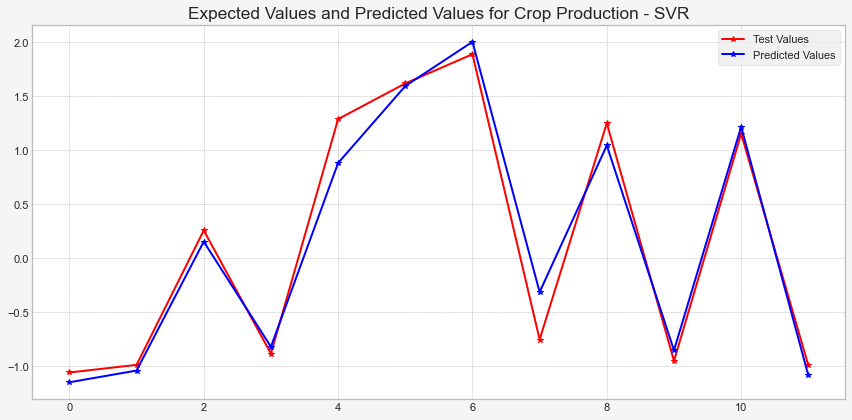

In [208]:
# Define plot space
fig, ax = plt.subplots(figsize=(12, 6),facecolor="#F5F5F5")
ax.set_facecolor("white")
#ax.spines[["right","top"]].set_visible(False)
#plt.style.library['bmh']['axes.grid'] = True
#plt.style.use('bmh')

# set font
lfont = {'family':'cursive','color':'green','size':15,'linespacing':8,'fontweight':'bold'}
lfontred = {'family':'cursive','color':'red','size':15,'linespacing':8,'fontweight':'bold'}
hfont = {'family':'cursive','size':18,'fontweight':'heavy'}

plt.plot(y_test, color="red",marker='*',label ='Test Values')
plt.plot(test_pred, color="blue",marker='*',label ='Predicted Values')
plt.title('Expected Values and Predicted Values for Crop Production - SVR')
plt.tight_layout()
  
# Function add a legend  
plt.legend()

plt.show()